In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/Catherine/projects/Capstone_Project_2/amazonalexareviews/amazon_alexa.tsv', 
                 delimiter = '\t', quoting = 3)
df.shape

(3150, 5)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [4]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [5]:
df.tail()

,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"""Perfect for kids, adults and everyone in betw...",1
3146,5,30-Jul-18,Black Dot,"""Listening to music, searching locations, chec...",1
3147,5,30-Jul-18,Black Dot,"""I do love these things, i have them running m...",1
3148,5,30-Jul-18,White Dot,"""Only complaint I have is that the sound quali...",1
3149,4,29-Jul-18,Black Dot,Good,1


In [6]:
df.isnull().any()

rating              False
date                False
variation           False
verified_reviews    False
feedback            False
dtype: bool

In [7]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [8]:
df['length'] = df['verified_reviews'].apply(len)

df.shape

(3150, 6)

In [9]:
df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [10]:
df.groupby('rating').describe()

feedback                                     length              \
          count mean  std  min  25%  50%  75%  max   count        mean   
rating                                                                   
1         161.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   161.0  195.658385   
2          96.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    96.0  250.020833   
3         152.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   152.0  208.098684   
4         455.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   455.0  179.338462   
5        2286.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  2286.0  109.006562   

                                                       
               std  min    25%    50%     75%     max  
rating                                                 
1       212.928219  1.0  36.00  120.0  284.00  1126.0  
2       270.179472  1.0  78.75  165.0  311.25  1688.0  
3       272.582517  1.0  54.00  131.0  286.00  1956.0  
4       216.415268  1.0  34.50  100.0  242.00  1362.0  
5       152.505019  1.0  27.00   65.0  136.00  2853.0

In [11]:
df.groupby('feedback').describe()

rating                                               length  \
           count      mean       std  min  25%  50%  75%  max   count   
feedback                                                                
0          257.0  1.373541  0.484688  1.0  1.0  1.0  2.0  2.0   257.0   
1         2893.0  4.737643  0.546544  3.0  5.0  5.0  5.0  5.0  2893.0   

                                                                   
                mean         std  min   25%    50%    75%     max  
feedback                                                           
0         215.964981  236.895519  1.0  53.0  137.0  291.0  1688.0  
1         125.274456  175.036515  1.0  29.0   70.0  155.0  2853.0

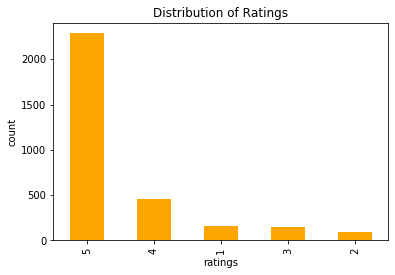

In [12]:
df['rating'].value_counts().plot.bar(color = 'orange')
plt.title('Distribution of Ratings')
plt.xlabel('ratings')
plt.ylabel('count')
plt.show()

In [13]:
df['rating'].value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

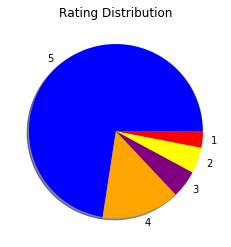

In [14]:
labels = '5', '4', '3', '2', '1'
sizes = [2286, 455, 161, 152, 96]
colors = ['blue', 'orange', 'purple', 'yellow', 'red']
explode = [0.001, 0.001, 0.001, 0.001, 0.001]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True)
plt.title('Rating Distribution')
plt.show()

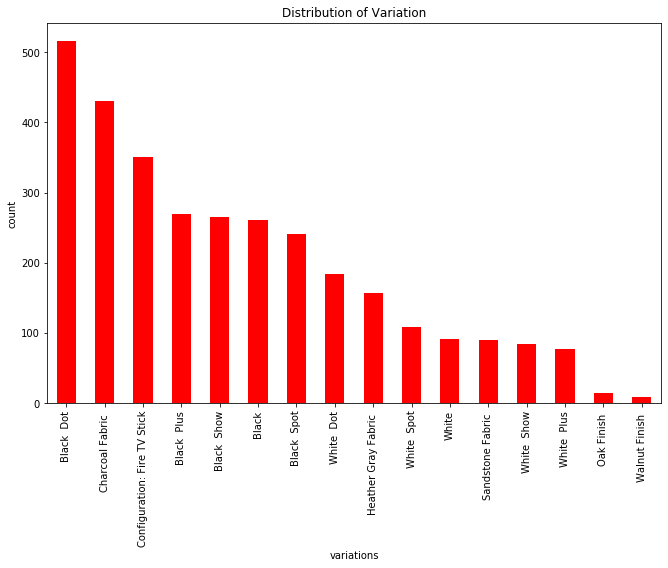

In [15]:
df['variation'].value_counts().plot.bar(color = 'red', figsize = (11, 7))
plt.title('Distribution of Variation')
plt.xlabel('variations')
plt.ylabel('count')
plt.show()

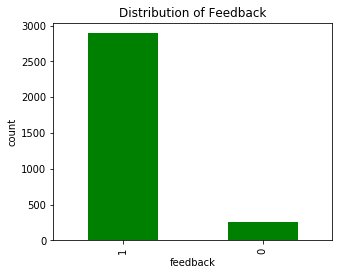

In [16]:
df['feedback'].value_counts().plot.bar(color = 'green', figsize = (5, 4))
plt.title('Distribution of Feedback')
plt.xlabel('feedback')
plt.ylabel('count')
plt.show()

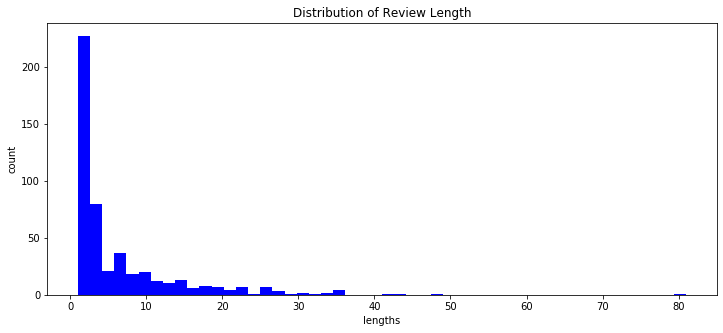

In [17]:
df['length'].value_counts().plot.hist(color = 'blue', figsize = (12, 5), bins = 50)
plt.title('Distribution of Review Length')
plt.xlabel('lengths')
plt.ylabel('count')
plt.show()

In [18]:
df.length.describe()

count    3150.000000
mean      132.673651
std       182.526953
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: length, dtype: float64

In [19]:
df[df['length'] == 1]['verified_reviews'].iloc[0]

'😍'

In [20]:
df[df['length'] == 21]['verified_reviews'].iloc[0]

'Good sound works well'

In [21]:
df[df['length'] == 50]['verified_reviews'].iloc[0]

'Yet another Exho for our home and love them all!!!'

In [22]:
df.date.describe()

count          3150
unique           77
top       30-Jul-18
freq           1603
Name: date, dtype: object

In [23]:
df['date'].value_counts()

30-Jul-18    1603
29-Jul-18     482
28-Jul-18     250
26-Jul-18      85
31-Jul-18      81
             ... 
2-Jun-18        2
29-May-18       1
9-Jun-18        1
13-Jun-18       1
4-Jun-18        1
Name: date, Length: 77, dtype: int64

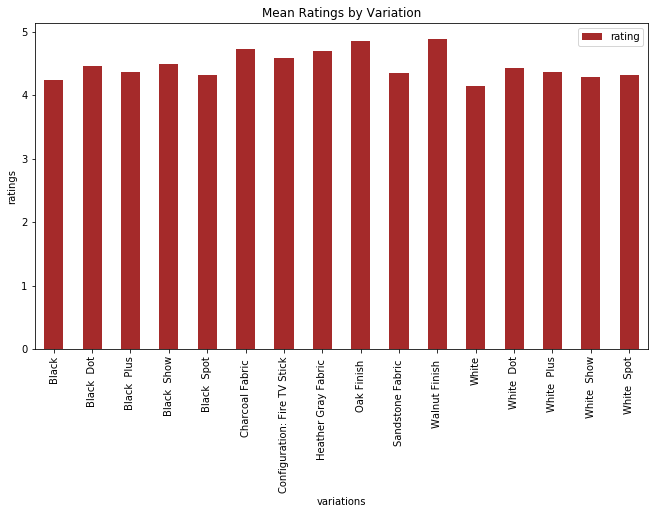

In [24]:
df.groupby('variation').mean()[['rating']].plot.bar(color = 'brown', figsize=(11, 6))
plt.title("Mean Ratings by Variation")
plt.xlabel('variations')
plt.ylabel('ratings')
plt.show()